<a href="https://colab.research.google.com/github/cekbote/pytorch-tutorials/blob/master/Image_Classification_using_Logistic_Regression_in_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Classification using Logistic Regression in PyTorch

In [1]:
import torch
import torchvision
from torchvision.datasets import MNIST

In [6]:
# Download training dataset

# When this statement is executed for the first time, it downloads the data to 
# the data/ directory next to the notebook and creates a PyTorch Dataset. On 
# subsequent executions, the download is skipped as the data is already 
# downloaded. Let's check the size of the dataset.

dataset = MNIST(root='data/', download=True)
len(dataset)

60000

In [9]:
# The dataset has 60,000 images which can be used to train the model. There is 
# also an additonal test set of 10,000 images which can be created by passing 
# train=False to the MNIST class.

test_dataset = MNIST(root='data/', train=False)
len(test_dataset)

10000

In [10]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x7F8F7DE39668>, 5)

In [11]:
# It's a pair, consisting of a 28x28 image and a label. The image is an object 
# of the class PIL.Image.Image, which is a part of the Python imaging library 
# Pillow. We can view the image within Jupyter using matplotlib, the de-facto 
# plotting and graphing library for data science in Python.

import matplotlib.pyplot as plt
%matplotlib inline

Label: 5


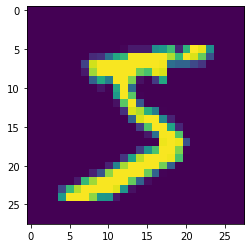

In [12]:
image, label = dataset[0]
plt.imshow(image)
print('Label:', label)

Label: 3


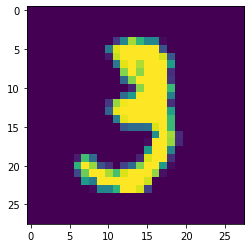

In [13]:
image, label = dataset[10]
plt.imshow(image)
print('Label:', label)

In [14]:
type(image)

PIL.Image.Image

In [17]:
# PyTorch datasets allow us to specify one or more transformation functions 
# which are applied to the images as they are loaded. torchvision.transforms 
# contains many such predefined functions, and we'll use the ToTensor transform 
# to convert images into PyTorch tensors.

import torchvision.transforms as transforms

In [18]:
dataset = MNIST(root='data/',
                train=True,
                transform=transforms.ToTensor())

In [23]:
# The first dimension is used to keep track of the color channels.

img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


In [25]:
# The values range from 0 to 1, with 0 representing black, 1 white and the 
# values in between different shades of grey. We can also plot the tensor as an 
# image using plt.imshow.

print(img_tensor[:, 10:15, 10:15])
print(torch.max(img_tensor), torch.min(img_tensor))

tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]]])
tensor(1.) tensor(0.)


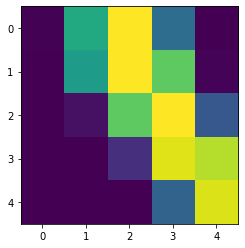

In [26]:
plt.imshow(img_tensor[0, 10:15, 10:15])

In [27]:
# Since there's no predefined validation set, we must manually split the 60,000 
# images into training and validation datasets. Let's set aside 10,000 randomly 
# chosen images for validation. We can do this using the random_spilt method 
# from PyTorch.

from torch.utils.data import random_split

train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [28]:
from torch.utils.data import DataLoader

batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size, shuffle= True)

## Model
